In [1]:
# print(fbfkjb)
import pandas as pd
import numpy as np
import nltk 
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import string

In [2]:
data=pd.read_csv("./text data/news_articles.csv")

data.shape

(2096, 12)

In [3]:
data=data.dropna()
data.shape

(2045, 12)

In [4]:
# from spellchecker import SpellChecker
#import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
#nltk.download("stopwords")

stop_words = stopwords.words("english")

#############################
### Get Data ##

# train= pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
# # concat all
# df=pd.concat([train,test])


# spell = SpellChecker()
# def correct_spellings(x, spell=spell):
#     """correct the missplled words of a given tweet"""
#     x = x.split()
#     misspelled = spell.unknown(x)
#     result = map(lambda word : spell.correction(word) if word in  misspelled else word, x)
#     return " ".join(result)

def tweets_cleaning(x, correct_spelling=False, remove_emojis=True, remove_stop_words=True):
    """Apply function to a clean a tweet"""
    x = x.lower().strip()
    # romove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    x = url.sub(r'',x)
    # remove html tags
    html = re.compile(r'<.*?>')
    x = html.sub(r'',x)
    # remove punctuation
    operator = str.maketrans('','',string.punctuation) #????
    x = x.translate(operator)
    if correct_spelling:
        x = correct_spellings(x)
    if remove_emojis:
        x = x.encode('ascii', 'ignore').decode('utf8').strip()
    if remove_stop_words:
        x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    return x




In [5]:
## APPLY the cleaning function to the text column
# data['cleaned_text'] = data['text'].apply(tweets_cleaning)


In [6]:
# data['text']=text_process(data['text'])

In [7]:
# data['text']

In [8]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# y = le.fit_transform(data.label)

In [9]:
# from sklearn.model_selection import train_test_split
# # from imblearn.over_sampling import SMOTE

# # X = data_oh.loc[:, data_oh.columns != 'Attrition_Flag']
# # y = data_oh['Attrition_Flag']
# x, x_test, y, y_test = train_test_split(data['cleaned_text'], y,test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [10]:

# x_train.to_csv("TEXT_X_train.csv")
# X_test.to_csv("TEXT_X_test.csv")

# x_cv.to_csv("TEXT_X_V.csv")
# np.savetxt("TEXTlabel_V.csv", y_cv, delimiter=",")
# np.savetxt("TEXTlabel_train.csv", y_train, delimiter=",")
# np.savetxt("TEXTlabel_test .csv", y_test , delimiter=","), 

In [11]:

x_train=pd.read_csv("TEXT_X_train.csv")
x_test=pd.read_csv("TEXT_X_test.csv")

x_cv=pd.read_csv("TEXT_X_V.csv")
y_cv=pd.read_csv("TEXTlabel_V.csv")
y_train=pd.read_csv("TEXTlabel_train.csv")
y_test =pd.read_csv("TEXTlabel_test .csv") 

In [12]:
x_train.shape

(1227, 2)

In [13]:
# X_test=X_test.drop('Unnamed: 0',axis=1)
y_train=pd.read_csv("TEXTlabel_train.csv")
y_train.shape

(1227, 2)

In [14]:
x_test.shape

(409, 2)

In [250]:
x_test

,text,cleaned_text
0,on november pm \nas predicted donald trump...,november pm \nas predicted donald trumps v...
1,by nili nathan \nposted friday october at am...,nili nathan \nposted friday october edt \nke...
2,kingdoms energy minister says move would risk ...,kingdoms energy minister says move would risk ...
3,worst of saudi economic slump yet to come \np...,worst saudi economic slump yet come \npress t...
4,iraq leader of iraqs semiautonomous kurdistan ...,iraq leader iraqs semiautonomous kurdistan reg...
...,...,...
404,posted by david risselada \nmuch to the surpri...,posted david risselada \nmuch surprise america...
405,email \n\nthe excitement over the us election ...,email \n\nthe excitement us election culminati...
406,home news breaking illegal alien causes mil...,home news breaking illegal alien causes mil...
407,washington free beacon october \nsenior whit...,washington free beacon october \nsenior whit...


In [16]:
x_test=x_test.drop('Unnamed: 0',axis=1)
x_train=x_train.drop('Unnamed: 0',axis=1)
y_test=y_test.drop('Unnamed: 0',axis=1)
y_train=y_train.drop('Unnamed: 0',axis=1)

In [17]:
x_train.shape

(1227, 1)

In [18]:
y_train.shape

(1227, 1)

In [19]:
x_cv=x_cv.drop('Unnamed: 0',axis=1)
y_cv=y_cv.drop('Unnamed: 0',axis=1)

In [20]:
y_cv.shape

(409, 1)

In [25]:
import tensorflow_hub as hub

In [26]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [27]:
message_embeddings = embed(x_train['cleaned_text'])


In [29]:
message_embeddings.shape

TensorShape([1227, 512])

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# print(afb)

In [ ]:
# # ngram level tf-idf 
# tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
# tfidf_vect_ngram.fit(x_train['cleaned_text'])
# xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train['cleaned_text'])


In [30]:
xtrain_tfidf_ngram=message_embeddings

In [190]:

xvalid_tfidf_ngram =  embed(x_cv['cleaned_text'])

KeyError: 'text'

In [219]:
xtrain_tfidf_ngram.dtype


dtype('float32')

In [218]:
xvalid_tfidf_ngram.dtype


dtype('float32')

In [231]:
x_test['cleaned_text'] = x_test['text'].apply(tweets_cleaning)


In [232]:
message_embeddings =  embed(x_test['cleaned_text'],)

In [234]:
# del(xtest_tfidf_ngram)
xtest_tfidf_ngram.dtype

tf.float32

In [233]:
xtest_tfidf_ngram=message_embeddings

In [222]:
import tensorflow as tf

In [238]:
xtest_tfidf_ngram= tf.cast(xtest_tfidf_ngram, dtype='float32')


In [252]:
xtest_tfidf_ngram=np.array(xtest_tfidf_ngram)

In [256]:
xtest_tfidf_ngram

array([[ 0.03621271, -0.04770545, -0.04798669, ...,  0.03091822,
        -0.04798758, -0.03491034],
       [ 0.04693752, -0.04799411,  0.03501153, ...,  0.02970324,
         0.04799334,  0.04549595],
       [ 0.04671502, -0.04671953, -0.04634537, ..., -0.04139103,
        -0.04671953, -0.04654075],
       ...,
       [ 0.04746977, -0.04749916,  0.04381335, ..., -0.04749719,
        -0.04750086, -0.04749212],
       [ 0.0353546 , -0.05154573, -0.05232391, ...,  0.02709214,
        -0.05276613,  0.02086133],
       [ 0.04475939, -0.04587021,  0.03900478, ..., -0.04587021,
        -0.04587021,  0.04467331]], dtype=float32)

In [248]:
tf.cast(xtest_tfidf_ngram, dtype=tf.float32)


<tf.Tensor: shape=(409, 512), dtype=float32, numpy=
array([[ 0.03621271, -0.04770545, -0.04798669, ...,  0.03091822,
        -0.04798758, -0.03491034],
       [ 0.04693752, -0.04799411,  0.03501153, ...,  0.02970324,
         0.04799334,  0.04549595],
       [ 0.04671502, -0.04671953, -0.04634537, ..., -0.04139103,
        -0.04671953, -0.04654075],
       ...,
       [ 0.04746977, -0.04749916,  0.04381335, ..., -0.04749719,
        -0.04750086, -0.04749212],
       [ 0.0353546 , -0.05154573, -0.05232391, ...,  0.02709214,
        -0.05276613,  0.02086133],
       [ 0.04475939, -0.04587021,  0.03900478, ..., -0.04587021,
        -0.04587021,  0.04467331]], dtype=float32)>

In [243]:
xtest_tfidf_ngram.dtype

tf.float32

In [33]:
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer

# 5. Decision Trees

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [ ]:

# pipeline_dt = Pipeline([
# ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ SVM
# ])

In [51]:
xtrain_tfidf_ngram=np.array(xtrain_tfidf_ngram)
xvalid_tfidf_ngram=np.array(xvalid_tfidf_ngram)

In [65]:
# from tempfile import TemporaryFile

# outfile = TemporaryFile()
np.save("xtrain_tfidf_ngram", xtrain_tfidf_ngram)

In [66]:
xtrain_tfidf_ngram.shape

(1227, 512)

In [67]:
# _ = outfile.seek(0) # Only needed here to simulate closing & reopening file

# np.load(outfile)
np.save("xvalid_tfidf_ngram", xvalid_tfidf_ngram)

In [259]:
# _ = outfile.seek(0) # Only needed here to simulate closing & reopening file

# np.load(outfile)
np.save("xtest_tfidf_ngram", xtest_tfidf_ngram)

In [52]:
parameter_decisiontree = {'max_depth':[4,5,6,7,8,9,10,13,16,18,21,24],
#                           'min_impurity_decrease':[0.1,0.2,0.3,0.25,0.35],
                         'ccp_alpha':np.arange(0, 0.4, 0.1).tolist(),
                          'criterion':['gini','entropy'],
#                          'min_samples_split':[0.1,0.08,0.06,.15]
                         }

model_DecTreeClass = DecisionTreeClassifier()
DTmodel  =GridSearchCV(model_DecTreeClass,parameter_decisiontree)

# model_DecTreeClass = DecisionTreeClassifier(random_state=0)
# DTmodel  =GridSearchCV(model_DecTreeClass,parameter_decisiontree)

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DecTreeClass)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC: %.2f' % (roc_auc*100), "%")




In [ ]:
xtrain_tfidf_ngram.shape


In [ ]:
DTmodel

In [ ]:
# y_train.columns=['label']

In [ ]:
263/(263+146)

In [ ]:
y_test.label.value_counts()

In [ ]:
y_train.label.value_counts()

In [ ]:
xtrain_tfidf_ngram.shape

In [53]:
DTmodel.fit(xtrain_tfidf_ngram,y_train['label'])
y_pred_DecTreeClass = DTmodel.predict(xvalid_tfidf_ngram)



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.30000000000000004],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 13, 16, 18, 21,
                                       24]})

In [54]:
DTmodel.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 24}

In [55]:
import joblib

joblib.dump(DTmodel, 'DTgrid_NLP_USEUSE.pkl')

['DTgrid_NLP_USE.pkl']

In [56]:
from sklearn import metrics

In [ ]:
y_train.label.value_counts()

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

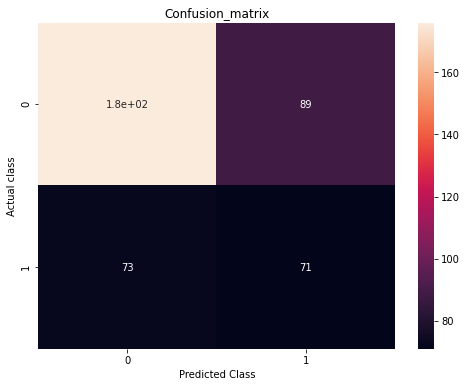

Confusion matrix: 
 [[176  89]
 [ 73  71]]
TP:  71
TN:  176
FP:  89
FN:  73
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68       265
           1       0.44      0.49      0.47       144

    accuracy                           0.60       409
   macro avg       0.58      0.58      0.58       409
weighted avg       0.61      0.60      0.61       409

Accuracy_Score: 60.391198044009776 %
Recall: 49.30555555555556 %
precision_score: 44.375 %
F1 Score: 46.71052631578947 %


In [57]:




conf_mat = metrics.confusion_matrix(y_cv, y_pred_DecTreeClass)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print('Classification report: \n', metrics.classification_report(y_cv, y_pred_DecTreeClass))
print('Accuracy_Score:',metrics.accuracy_score(y_cv, y_pred_DecTreeClass)*100,'%')
# print('Recall:',metrics.recall_score(y_cv, y_pred_DecTreeClass)*100,'%')
print('Recall:',metrics.recall_score(y_cv, y_pred_DecTreeClass)*100,'%')
print('precision_score:',metrics.precision_score(y_cv, y_pred_DecTreeClass)*100,'%')
print('F1 Score:',metrics.f1_score(y_cv, y_pred_DecTreeClass)*100,'%')

In [58]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, DTmodel.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, DTmodel.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, DTmodel.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, DTmodel.predict(xtrain_tfidf_ngram))*100,'%')

Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %


Text(0.5, 1.0, 'Validation Curve with DT')

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Score')

(0.0, 1.1)

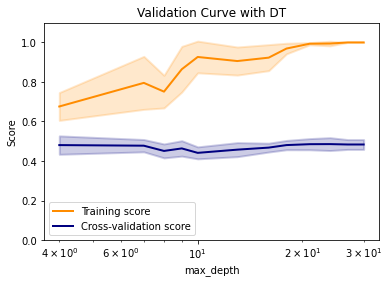

In [61]:
parameter_decisiontree = [4,7,8,9,10,13,16,18,21,24,27,30]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    DecisionTreeClassifier(random_state=0,criterion='entropy'), xtrain_tfidf_ngram, y_train,
    param_range=parameter_decisiontree,  scoring="precision",param_name="max_depth",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=[4,7,8,9,10,13,16,18,21,24,27,30]
plt.title("Validation Curve with DT")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Validation Curve with DT')

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Score')

(0.0, 1.1)

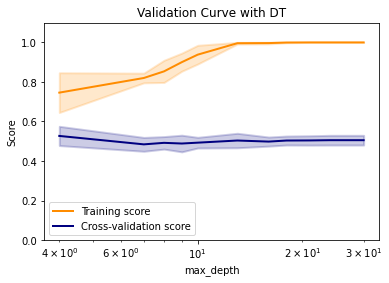

In [68]:
parameter_decisiontree = [4,7,8,9,10,13,16,18,21,24,27,30]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    DecisionTreeClassifier(random_state=0,criterion='gini'), xtrain_tfidf_ngram, y_train,
    param_range=parameter_decisiontree,  scoring="precision",param_name="max_depth",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=[4,7,8,9,10,13,16,18,21,24,27,30]
plt.title("Validation Curve with DT")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [69]:


dt = DecisionTreeClassifier(random_state=42, criterion="gini",
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)

In [70]:
dt.fit(xtrain_tfidf_ngram,y_train['label'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [71]:
joblib.dump(dt, 'DT_dt_NLP_USE_depth8USE.pkl')

['DT_dt_NLP_USE_depth8.pkl']

In [72]:
predictions_dt = dt.predict(xvalid_tfidf_ngram)

In [73]:
print(classification_report(predictions_dt,y_cv))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       265
           1       0.42      0.42      0.42       144

    accuracy                           0.59       409
   macro avg       0.56      0.56      0.56       409
weighted avg       0.59      0.59      0.59       409



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

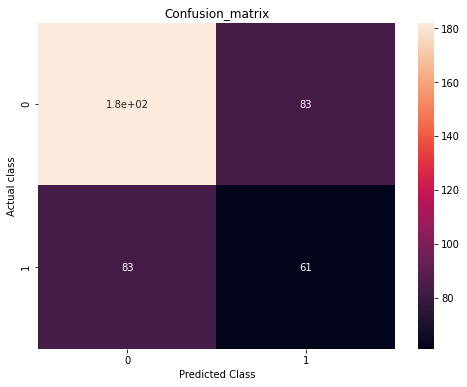

Confusion matrix: 
 [[182  83]
 [ 83  61]]
TP:  61
TN:  182
FP:  83
FN:  83
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       265
           1       0.42      0.42      0.42       144

    accuracy                           0.59       409
   macro avg       0.56      0.56      0.56       409
weighted avg       0.59      0.59      0.59       409

Accuracy_Score: 59.41320293398533 %
Recall: 42.36111111111111 %
precision_score: 42.36111111111111 %
F1 Score: 42.36111111111111 %


In [74]:




conf_mat = metrics.confusion_matrix(y_cv, predictions_dt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print('Classification report: \n', metrics.classification_report(y_cv, predictions_dt))
print('Accuracy_Score:',metrics.accuracy_score(y_cv, predictions_dt)*100,'%')
# print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('precision_score:',metrics.precision_score(y_cv, predictions_dt)*100,'%')
print('F1 Score:',metrics.f1_score(y_cv, predictions_dt)*100,'%')

In [75]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')

Training Accuracy_Score: 83.45558272208639 %
Training Recall: 73.49137931034483 %
Training precision_score: 80.9976247030879 %
Training F1 Score: 77.06214689265536 %


In [183]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, dt.predict(xtrain_tfidf_ngram))*100,'%')

Training Accuracy_Score: 78.15810920945395 %
Training Recall: 65.73275862068965 %
Training precision_score: 73.67149758454107 %
Training F1 Score: 69.47608200455582 %


ccp_alpha is 0 in the above one. so reducing ccp_alpha to reduce overfitting

In [82]:
clf = DecisionTreeClassifier(random_state=42, criterion="gini",
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)
path = clf.cost_complexity_pruning_path(xtrain_tfidf_ngram,y_train['label'])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [83]:
ccp_alphas

array([0.        , 0.00122249, 0.00130399, 0.00142624, 0.001496  ,
       0.00150461, 0.00150461, 0.00153944, 0.00156479, 0.00157379,
       0.00158077, 0.00253554, 0.00253554, 0.00270191, 0.00279427,
       0.00282532, 0.00284723, 0.00297651, 0.00325998, 0.00333771,
       0.0037454 , 0.00409827, 0.00430318, 0.00439935, 0.00444892,
       0.00465906, 0.00470614, 0.00498634, 0.00503196, 0.00510127,
       0.00519768, 0.00526489, 0.00543063, 0.00566786, 0.00575291,
       0.00577849, 0.00646219, 0.00648468, 0.00654565, 0.00693342,
       0.00704861, 0.00750596, 0.00776389, 0.00808634, 0.0098563 ,
       0.01922709])

In [84]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,max_depth=8)
    clf.fit(xtrain_tfidf_ngram,y_train['label'])
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

DecisionTreeClassifier(max_depth=8, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0012224938875305623, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0013039934800325996, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0014262428687856561, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0014960009945712963, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015046078615760761, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015046078615760761, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015394367472607085, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015647921760391194, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015737852345221021, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0015807661633718223, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.002535542877841166, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.002535542877841166, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.002701905538091357, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0027942717429270004, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0028253192067373, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.002847227699345375, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.002976506856596151, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0032599837000814994, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.003337710829343272, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0037453995736557305, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004098265222959602, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004303178484107581, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004399348743828746, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0044489189318759285, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004659060038033144, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004706141882824422, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004986339848174974, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005031960045513783, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005101270789942346, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005197678093242189, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005264886330847849, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005430628173766928, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0056678593871172704, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.00575291241190853, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005778490256484872, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.006462192220330741, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.006484680224165082, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.006545645496549017, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0069334229352245105, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.007048613405581605, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.007505960391841093, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0077638894133046366, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.008086341344443318, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.009856299255637302, max_depth=8,
                       random_state=0)

DecisionTreeClassifier(ccp_alpha=0.019227087554423872, max_depth=8,
                       random_state=0)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.019227087554423872


In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1] #removign last ccp_alpha as it hasa only one node

In [92]:
# clfs[1].score(xtrain_tfidf_ngram,y_train['label'],"precision")
len(train_scores)

45

In [97]:
len([metrics.precision_score(y_train['label'],clf.predict(xtrain_tfidf_ngram))for clf in clfs])

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

Text(0.5, 0, 'ccp_alpha')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision vs alpha for training and validation sets')

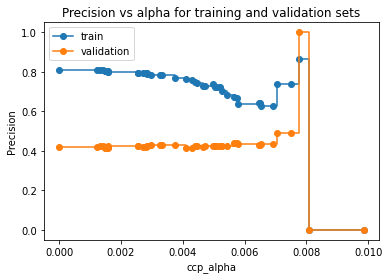

In [128]:
train_precision = [metrics.precision_score(y_train['label'],clf.predict(xtrain_tfidf_ngram))for clf in clfs]
test_precision =[metrics.precision_score(y_cv['label'],clf.predict(xvalid_tfidf_ngram))for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_precision, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_precision, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'accuracy')

Text(0.5, 1.0, 'Accuracy vs alpha for training and testing sets')

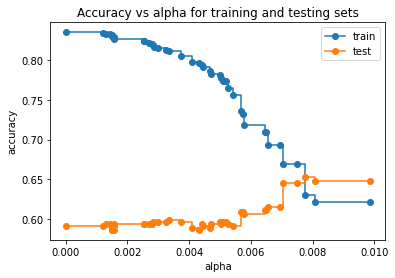

In [94]:
train_scores = [clf.score(xtrain_tfidf_ngram,y_train['label']) for clf in clfs]
test_scores = [clf.score(xvalid_tfidf_ngram,y_cv['label']) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

DecisionTreeClassifier(ccp_alpha=0.008, max_depth=8, random_state=42)

['DT_dt_NLP_USE_depth8_ccc0008.pkl']

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       407
           1       0.01      1.00      0.03         2

    accuracy                           0.65       409
   macro avg       0.51      0.83      0.41       409
weighted avg       1.00      0.65      0.78       409



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

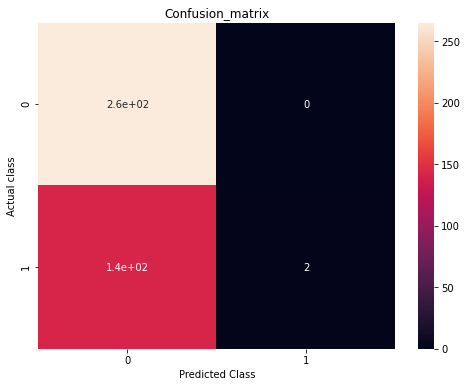

Confusion matrix: 
 [[265   0]
 [142   2]]
TP:  2
TN:  265
FP:  0
FN:  142
Classification report: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       265
           1       1.00      0.01      0.03       144

    accuracy                           0.65       409
   macro avg       0.83      0.51      0.41       409
weighted avg       0.77      0.65      0.52       409

Accuracy_Score: 65.28117359413203 %
Recall: 1.3888888888888888 %
precision_score: 100.0 %
F1 Score: 2.73972602739726 %
Training Accuracy_Score: 63.08068459657702 %
Training Recall: 2.8017241379310347 %
Training precision_score: 86.66666666666667 %
Training F1 Score: 5.427974947807933 %


In [99]:


dt8 = DecisionTreeClassifier(random_state=42, criterion="gini",ccp_alpha=0.008,
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)

dt8.fit(xtrain_tfidf_ngram,y_train['label'])

joblib.dump(dt8, 'DT_dt_NLP_USE_depth8_ccc0008USE.pkl')

predictions_dt = dt8.predict(xvalid_tfidf_ngram)

print(classification_report(predictions_dt,y_cv))





conf_mat = metrics.confusion_matrix(y_cv, predictions_dt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print('Classification report: \n', metrics.classification_report(y_cv, predictions_dt))
print('Accuracy_Score:',metrics.accuracy_score(y_cv, predictions_dt)*100,'%')
# print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('precision_score:',metrics.precision_score(y_cv, predictions_dt)*100,'%')
print('F1 Score:',metrics.f1_score(y_cv, predictions_dt)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, dt8.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, dt8.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, dt8.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, dt8.predict(xtrain_tfidf_ngram))*100,'%')

DecisionTreeClassifier(ccp_alpha=0.007, max_depth=8, random_state=42)

['DT_dt_NLP_USE_depth8_ccc0007.pkl']

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       310
           1       0.30      0.43      0.35        99

    accuracy                           0.62       409
   macro avg       0.54      0.55      0.54       409
weighted avg       0.67      0.62      0.64       409



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

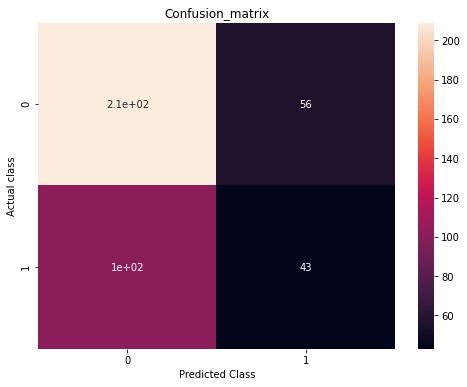

Confusion matrix: 
 [[209  56]
 [101  43]]
TP:  43
TN:  209
FP:  56
FN:  101
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       265
           1       0.43      0.30      0.35       144

    accuracy                           0.62       409
   macro avg       0.55      0.54      0.54       409
weighted avg       0.59      0.62      0.60       409

Accuracy_Score: 61.61369193154034 %
Recall: 29.86111111111111 %
precision_score: 43.43434343434344 %
F1 Score: 35.390946502057616 %
Training Accuracy_Score: 69.3561532192339 %
Training Recall: 46.55172413793103 %
Training precision_score: 62.7906976744186 %
Training F1 Score: 53.46534653465347 %


In [101]:


dt7 = DecisionTreeClassifier(random_state=42, criterion="gini",ccp_alpha=0.007,
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)

dt7.fit(xtrain_tfidf_ngram,y_train['label'])

joblib.dump(dt7, 'DT_dt_NLP_USE_depth8_ccc0007USE.pkl')

predictions_dt = dt7.predict(xvalid_tfidf_ngram)

print(classification_report(predictions_dt,y_cv))





conf_mat = metrics.confusion_matrix(y_cv, predictions_dt)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print('Classification report: \n', metrics.classification_report(y_cv, predictions_dt))
print('Accuracy_Score:',metrics.accuracy_score(y_cv, predictions_dt)*100,'%')
# print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('Recall:',metrics.recall_score(y_cv, predictions_dt)*100,'%')
print('precision_score:',metrics.precision_score(y_cv, predictions_dt)*100,'%')
print('F1 Score:',metrics.f1_score(y_cv, predictions_dt)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, dt7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, dt7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, dt7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, dt7.predict(xtrain_tfidf_ngram))*100,'%')

Text(0.5, 1.0, 'LEARNING CURVE FOR DT Classifier-F1Score')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'F1 Score'),
 <matplotlib.legend.Legend at 0x7f26700309b0>)

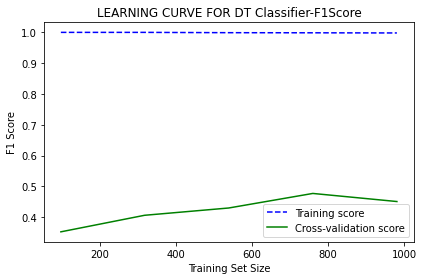

In [60]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
dtPredictions=dt.predict(xtrain_tfidf_ngram)
# Custom scorer
target = 1 # class you want to plot
scorer = make_scorer(lambda y_train,dtPredictions : f1_score(
    y_train, dtPredictions, 
    labels=None, 
    
    average='binary', 
    sample_weight=None))


sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(criterion='entropy',max_depth= 30),xtrain_tfidf_ngram, y_train,scoring=scorer)

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR DT Classifier-F1Score") 
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
dtPredictions=dt.predict(xtrain_tfidf_ngram)
# Custom scorer
target = 1 # class you want to plot
scorer = make_scorer(lambda y_train,dtPredictions : f1_score(
    y_train, dtPredictions, 
    labels=None, 
    
    average='binary', 
    sample_weight=None))

# train_sizes, train_scores, test_scores = learning_curve(
#     estimator, 
#     X, 
#     y, 
#     cv=cv,
#     scoring=scorer)

Text(0.5, 1.0, 'LEARNING CURVE FOR DT Classifier-Precision')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Precision'),
 <matplotlib.legend.Legend at 0x7f274f146400>)

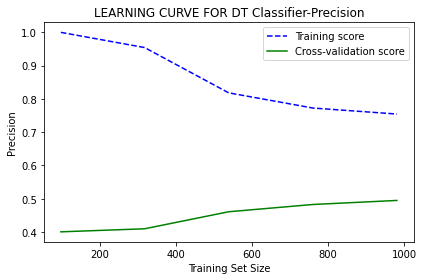

In [132]:
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(random_state=42, criterion="gini",ccp_alpha=0.007,
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)
,xtrain_tfidf_ngram, y_train,scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR DT Classifier-Precision") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'LEARNING CURVE FOR DT Classifier-Precision')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Precision'),
 <matplotlib.legend.Legend at 0x7f274f0af780>)

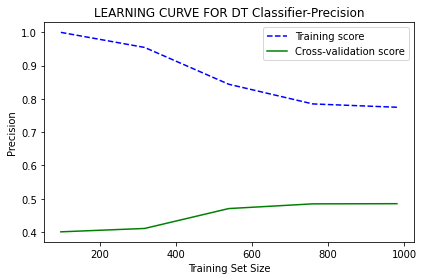

In [133]:
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(random_state=42, criterion="gini",ccp_alpha=0.006,
#                              min_samples_split=10, min_samples_leaf=10,
                            max_depth=8)
,xtrain_tfidf_ngram, y_train,scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR DT Classifier-Precision") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [197]:
def getMetrics(modelObj,xTrain,yTrain,xtest,ytest):
    y_pred_DecTreeClass2 = modelObj.predict(xtest)
    print('Classification report: \n', metrics.classification_report(ytest, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict(xTrain))*100,'%')
    
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict(xTrain))*100,'%')

    
    print('Test Accuracy_Score:',metrics.accuracy_score(ytest, y_pred_DecTreeClass2)*100,'%')
   
    print('Test Precision:',metrics.precision_score(ytest, y_pred_DecTreeClass2)*100,'%')
    print('Test Recall:',metrics.recall_score(ytest, y_pred_DecTreeClass2)*100,'%')
    print('Test F1 Score:',metrics.f1_score(ytest, y_pred_DecTreeClass2)*100,'%')

In [200]:
1227/2000

0.6135

In [199]:
print(x_train.shape)
print(x_test.shape)
print(x_cv.shape)

(1227, 1)
(409, 2)
(409, 1)


In [198]:
getMetrics(dt7,xtrain_tfidf_ngram,y_train,xtest_tfidf_ngram,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.74      0.69       263
           1       0.36      0.27      0.31       146

    accuracy                           0.57       409
   macro avg       0.50      0.50      0.50       409
weighted avg       0.54      0.57      0.55       409

Training Accuracy_Score: 69.3561532192339 %
Training Precision: 62.7906976744186 %
Training Recall: 46.55172413793103 %
Training F1 Score: 53.46534653465347 %
Test Accuracy_Score: 56.96821515892421 %
Test Precision: 36.11111111111111 %
Test Recall: 26.71232876712329 %
Test F1 Score: 30.708661417322837 %


# SVM

In [102]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  


In [103]:
# fitting the model for grid search 
grid.fit(xtrain_tfidf_ngram, y_train['label']) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1

[CV 3/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 4/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 5/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV 2/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV 3/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV 4/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV 5/5] END ...............

[CV 1/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV 2/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV 3/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV 4/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV 5/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV 1/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 3/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 4/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 1/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.2s
[CV 2/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.1s
[CV 3/5] END ..............C

[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=   0.9s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=   1.9s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=   1.1s
[CV 1/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV 2/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV 3/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV 4/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV 5/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [104]:
joblib.dump(grid,'SVM_gridNLP_USEUSE.pkl')


grid.best_params_




['SVM_gridNLP_USE.pkl']

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [105]:
y_pred_SVM = grid.best_estimator_.predict(xvalid_tfidf_ngram)

In [ ]:
y_cv


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

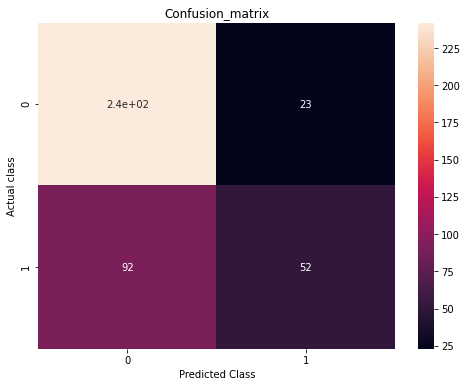

Confusion matrix: 
 [[242  23]
 [ 92  52]]
TP:  52
TN:  242
FP:  23
FN:  92
Accuracy_Score: 71.88264058679707 %
precision_score: 69.33333333333334 %
recall_score: 36.11111111111111 %
f1_score: 47.48858447488583 %


In [106]:

conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_svm,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat_svm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('f1_score:',metrics.f1_score(y_cv['label'], y_pred_SVM)*100,'%')


In [107]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, grid.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, grid.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, grid.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, grid.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


Training Accuracy_Score: 84.92257538712306 %
Training Recall: 63.793103448275865 %
Training precision_score: 94.56869009584665 %
Training F1 Score: 76.19047619047619 %


Text(0.5, 1.0, 'LEARNING CURVE FOR SVM Classifier')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Accuracy Score'),
 <matplotlib.legend.Legend at 0x7f262caa8320>)

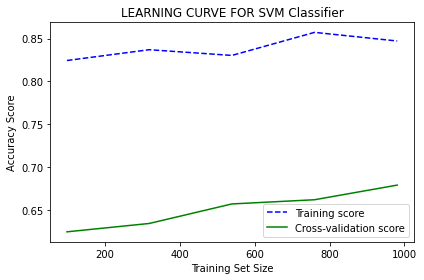

In [108]:

from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(SVC(C=1,gamma=1,kernel='rbf'),xtrain_tfidf_ngram, y_train['label'])

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()




In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

    C: Inverse of the strength of regularization.

Behavior: As the value of ‘c’ increases the model gets overfits.

As the value of ‘c’ decreases the model underfits.

2. γ : Gamma (used only for RBF kernel)

Behavior: As the value of ‘ γ’ increases the model gets overfits.

As the value of ‘ γ’ decreases the model underfits.

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

In [ ]:
np.arange(0.0001,0.1,0.01)

In [ ]:
test_scores_mean

The gamma parameter is not large but still the model is still overfitting. Hence we are going to tune C parameter

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

Text(0.5, 1.0, 'Validation Curve with SVM varying C')

Text(0.5, 0, 'C')

Text(0, 0.5, 'Precision')

(0.0, 1.1)

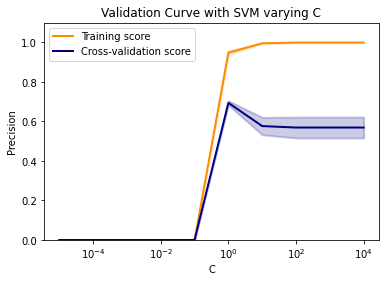

In [140]:
# parameter_svm = np.arange(0.0001,0.1,0.01)
parameter_svm =[0.00001,0.0001,0.01,0.1, 1, 10, 100, 1000,10000]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("C")
plt.ylabel("Precision")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

Text(0.5, 1.0, 'Validation Curve with SVM varying Gamma')

Text(0.5, 0, 'Gamma')

Text(0, 0.5, 'Score')

(0.0, 1.1)

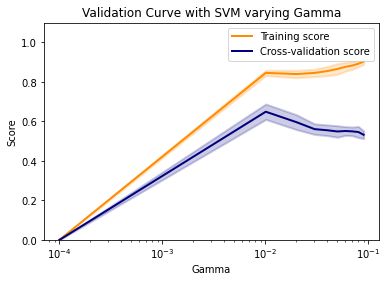

In [141]:
parameter_svm = np.arange(0.0001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(C=50,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="precision",param_name="gamma",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying Gamma")
plt.xlabel("Gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
(sklearn.metrics.SCORERS.keys())

The model is underfitting with a high bias and low variance. when the C value is reduced and overfitting when the values are not too high. From learning curve and validation curve results, it is clear that adding more data can only help increase the performance of the model

In [ ]:
 np.arange(0.001,0.1,0.01)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END ...................C=1e-05, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=1e-05, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END ...................C=1e-05, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END ...................C=1e-05, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=1e-05, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ................C=1e-05, gamma=1, kernel=linear; total time=   0.1s
[CV 2/5] END ................C=1e-05, gamma=1, kernel=linear; total time=   0.1s
[CV 3/5] END ................C=1e-05, gamma=1, kernel=linear; total time=   0.1s
[CV 4/5] END ................C=1e-05, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END ................C=1e-05, gamma=1, kernel=linear; total time=   0.2s
[CV 1/5] END ..................C=1e-05, gamma=1, kernel=poly; total time=   0.2s
[CV 2/5] END ..................C=1e-05, gamma=

[CV 2/5] END ...............C=0.0001, gamma=0.1, kernel=poly; total time=   0.1s
[CV 3/5] END ...............C=0.0001, gamma=0.1, kernel=poly; total time=   0.1s
[CV 4/5] END ...............C=0.0001, gamma=0.1, kernel=poly; total time=   0.1s
[CV 5/5] END ...............C=0.0001, gamma=0.1, kernel=poly; total time=   0.1s
[CV 1/5] END ...............C=0.0001, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ...............C=0.0001, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END ...............C=0.0001, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 4/5] END ...............C=0.0001, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 5/5] END ...............C=0.0001, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 1/5] END ............C=0.0001, gamma=0.01, kernel=linear; total time=   0.2s
[CV 2/5] END ............C=0.0001, gamma=0.01, kernel=linear; total time=   0.1s
[CV 3/5] END ............C=0.0001, gamma=0.01, kernel=linear; total time=   0.1s
[CV 4/5] END ............C=0

[CV 5/5] END .............C=0.01, gamma=0.001, kernel=linear; total time=   0.1s
[CV 1/5] END ...............C=0.01, gamma=0.001, kernel=poly; total time=   0.1s
[CV 2/5] END ...............C=0.01, gamma=0.001, kernel=poly; total time=   0.1s
[CV 3/5] END ...............C=0.01, gamma=0.001, kernel=poly; total time=   0.1s
[CV 4/5] END ...............C=0.01, gamma=0.001, kernel=poly; total time=   0.1s
[CV 5/5] END ...............C=0.01, gamma=0.001, kernel=poly; total time=   0.1s
[CV 1/5] END ...............C=0.01, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 2/5] END ...............C=0.01, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 3/5] END ...............C=0.01, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 4/5] END ...............C=0.01, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 5/5] END ...............C=0.01, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 1/5] END ............C=0.01, gamma=0.0001, kernel=linear; total time=   0.2s
[CV 2/5] END ............C=0

[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV 1/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.2s
[CV 2/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.2s
[CV 3/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.2s
[CV 4/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.2s
[CV 5/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.2s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 4/5] END ...............

[CV 4/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 1/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV 2/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV 3/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV 4/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV 5/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV 1/5] END ..................C=10, gamma=0.01, kernel=poly; total time=   0.2s
[CV 2/5] END ..................C=10, gamma=0.01, kernel=poly; total time=   0.2s
[CV 3/5] END ..................C=10, gamma=0.01, kernel=poly; total time=   0.2s
[CV 4/5] END ..................C=10, gamma=0.01, kernel=poly; total time=   0.2s
[CV 5/5] END ..................C=10, gamma=0.01, kernel=poly; total time=   0.2s
[CV 1/5] END ...............

[CV 1/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 2/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 3/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 4/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV 5/5] END ................C=100, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 1/5] END .............C=100, gamma=0.0001, kernel=linear; total time=   0.4s
[CV 2/5] END .............C=100, gamma=0.0001, kernel=linear; total time=   0.3s
[CV 3/5] END .............C=100, gamma=0.0001, kernel=linear; total time=   0.4s
[CV 4/5] END .............C=100, gamma=0.0001, kernel=linear; total time=   0.3s
[CV 5/5] END .............C=100, gamma=0.0001, kernel=linear; total time=   0.3s
[CV 1/5] END ...............C=100, gamma=0.0001, kernel=poly; total time=   0.2s
[CV 2/5] END ...............C=100, gamma=0.0001, kernel=poly; total time=   0.2s
[CV 3/5] END ...............

[CV 4/5] END ..................C=10000, gamma=1, kernel=poly; total time=   0.2s
[CV 5/5] END ..................C=10000, gamma=1, kernel=poly; total time=   0.2s
[CV 1/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 1/5] END ..............C=10000, gamma=0.1, kernel=linear; total time=   1.1s
[CV 2/5] END ..............C=10000, gamma=0.1, kernel=linear; total time=   1.1s
[CV 3/5] END ..............C=10000, gamma=0.1, kernel=linear; total time=   0.8s
[CV 4/5] END ..............C=10000, gamma=0.1, kernel=linear; total time=   1.3s
[CV 5/5] END ..............C=10000, gamma=0.1, kernel=linear; total time=   1.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

['SVM_gridNLP_wider_USE.pkl']

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

,label
0,0
1,1
2,0
3,0
4,0
...,...
404,0
405,0
406,0
407,0


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

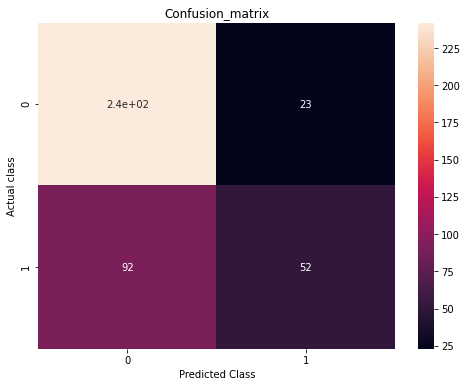

Confusion matrix: 
 [[242  23]
 [ 92  52]]
TP:  52
TN:  242
FP:  23
FN:  92
Accuracy_Score: 71.88264058679707 %
precision_score: 69.33333333333334 %
recall_score: 36.11111111111111 %
f1_score: 47.48858447488583 %
Training Accuracy_Score: 84.92257538712306 %
Training Recall: 63.793103448275865 %
Training precision_score: 94.56869009584665 %
Training F1 Score: 76.19047619047619 %


In [137]:
from sklearn.svm import SVC

param_grid = {'C': [0.00001,0.0001,0.01,0.1, 1, 10, 100, 1000,10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  


# fitting the model for grid search 
grid2.fit(xtrain_tfidf_ngram, y_train['label']) 





y_pred_SVM = grid2.best_estimator_.predict(xvalid_tfidf_ngram)

y_cv



conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_svm,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat_svm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('f1_score:',metrics.f1_score(y_cv['label'], y_pred_SVM)*100,'%')


print('Training Accuracy_Score:',metrics.accuracy_score(y_train, grid2.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, grid2.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, grid2.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, grid2.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


In [138]:
joblib.dump(grid2,'SVM_gridNLP_wider_USE.pkl')


grid2.best_params_


['SVM_gridNLP_wider_USE.pkl']

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

SVC(C=50, gamma=0.01)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

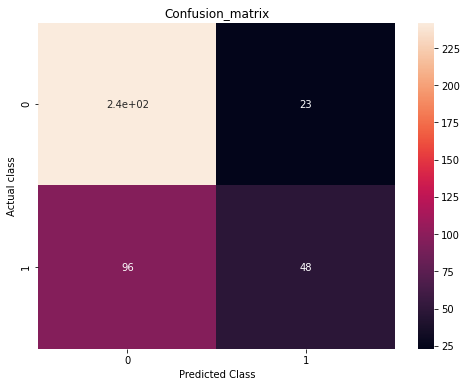

Confusion matrix: 
 [[242  23]
 [ 96  48]]
TP:  48
TN:  242
FP:  23
FN:  96
Accuracy_Score: 70.90464547677261 %
precision_score: 67.6056338028169 %
recall_score: 33.33333333333333 %
f1_score: 44.651162790697676 %
Training Accuracy_Score: 74.40912795436023 %
Training Recall: 41.16379310344828 %
Training precision_score: 82.32758620689656 %
Training F1 Score: 54.88505747126437 %


In [145]:
from sklearn.svm import SVC

param_grid = {'C': 50,  
              'gamma':  0.01, 
              'kernel': 'rbf'}  

svmmodelHypertuned =SVC(C=50,kernel='rbf',gamma=0.01) 
  


# fitting the model for grid search 
svmmodelHypertuned.fit(xtrain_tfidf_ngram, y_train['label']) 





y_pred_SVM = svmmodelHypertuned.predict(xvalid_tfidf_ngram)

# y_cv



conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_svm,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat_svm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('f1_score:',metrics.f1_score(y_cv['label'], y_pred_SVM)*100,'%')


print('Training Accuracy_Score:',metrics.accuracy_score(y_train, svmmodelHypertuned.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, svmmodelHypertuned.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, svmmodelHypertuned.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, svmmodelHypertuned.predict(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/m

Text(0.5, 1.0, 'Validation Curve with SVM varying C')

Text(0.5, 0, 'C')

Text(0, 0.5, 'Score')

(0.0, 1.1)

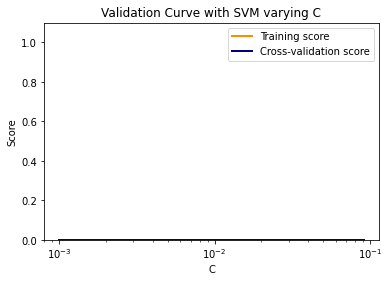

In [136]:
parameter_svm = np.arange(0.001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'LEARNING CURVE FOR SVM Classifier')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Precision Score'),
 <matplotlib.legend.Legend at 0x7f27481f7be0>)

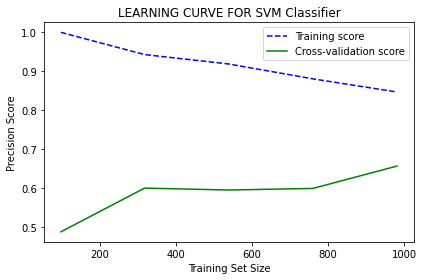

In [148]:

from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(SVC(C=50,gamma=0.01,kernel='rbf'),xtrain_tfidf_ngram, y_train['label'],scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()




In [201]:
getMetrics(svmmodelHypertuned,xtrain_tfidf_ngram,y_train,xtest_tfidf_ngram,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.79      0.70       263
           1       0.32      0.18      0.23       146

    accuracy                           0.57       409
   macro avg       0.48      0.48      0.47       409
weighted avg       0.52      0.57      0.53       409

Training Accuracy_Score: 74.40912795436023 %
Training Precision: 82.32758620689656 %
Training Recall: 41.16379310344828 %
Training F1 Score: 54.88505747126437 %
Test Accuracy_Score: 57.21271393643031 %
Test Precision: 32.098765432098766 %
Test Recall: 17.80821917808219 %
Test F1 Score: 22.90748898678414 %


# KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

gridKNN= {
    'n_neighbors':list(range(1,10,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn = GridSearchCV(
KNeighborsClassifier(),
gridKNN,
verbose=1,
cv=5)

In [114]:
# knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain_tfidf_ngram, y_train['label']) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [115]:


joblib.dump(knn, 'KNN_gridsearch_NLP_USEUSE.pkl')

['KNN_gridsearch_NLP_USE.pkl']

In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold



In [117]:
knnModel=knn
knnModel.best_params_



{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [178]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_knn= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'euclidean',weights= 'distance'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)




Text(0.5, 1.0, 'Validation Curve with KNN-Distance weights')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Score')

(0.0, 1.1)

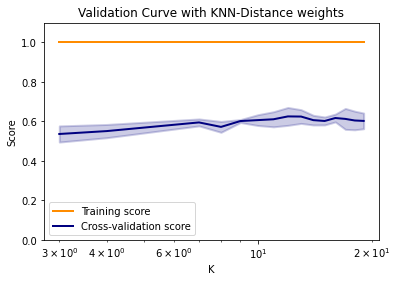

In [179]:
train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN-Distance weights")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
# y_cv

In [120]:
knn_predictions1 = knnModel.best_estimator_.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions1)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions1,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions1)*100,'%')



knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %
Accuracy_Score: 67.48166259168704 %
precision_score: 54.19847328244275 %
recall_score: 49.30555555555556 %


From the graph, it is evident that the model performs the best at K=3. However, we notice that training and precision is 99 whereas validation precision is 76. This is clear case of overfitting.

In [121]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn7 = KNeighborsClassifier(
n_neighbors=7,
    metric='euclidean', weights= 'distance')

# knn = KNeighborsClassifier(n_neighbors=2)
knn7.fit(xtrain_tfidf_ngram, y_train['label']) 



joblib.dump(knn7, 'KNN_gridsearch_NLP_USE_K7USE.pkl')

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

['KNN_gridsearch_NLP_USE_K7.pkl']

In [122]:
knn_predictions7 = knn7.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions7)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions7,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions7)*100,'%')



knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %
Accuracy_Score: 68.45965770171149 %
precision_score: 55.81395348837209 %
recall_score: 50.0 %


In [123]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn5 = KNeighborsClassifier(
n_neighbors=5,
    metric='euclidean', weights= 'distance')

# knn = KNeighborsClassifier(n_neighbors=2)
knn5.fit(xtrain_tfidf_ngram, y_train['label']) 



joblib.dump(knn5, 'KNN_gridsearch_NLP_USE_K5USE.pkl')

knn_predictions5 = knn5.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions5)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions5,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions5)*100,'%')



KNeighborsClassifier(metric='euclidean', weights='distance')

['KNN_gridsearch_NLP_USE_K5.pkl']

knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %
Accuracy_Score: 66.99266503667481 %
precision_score: 53.23741007194245 %
recall_score: 51.388888888888886 %


In [170]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn5 = KNeighborsClassifier(
n_neighbors=5,
    metric='manhattan', weights= 'distance')

# knn = KNeighborsClassifier(n_neighbors=2)
knn5.fit(xtrain_tfidf_ngram, y_train['label']) 



# joblib.dump(knn5, 'KNN_gridsearch_NLP_USE_K5USE.pkl')

knn_predictions5 = knn5.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions5)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions5,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions5)*100,'%')



KNeighborsClassifier(metric='manhattan', weights='distance')

knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %
Accuracy_Score: 68.45965770171149 %
precision_score: 55.319148936170215 %
recall_score: 54.166666666666664 %


In [171]:
knn5.

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='manhattan', weights='distance')>

In [174]:

# from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn5 = KNeighborsClassifier(
n_neighbors=5,algorithm='kd_tree',
    metric='euclidean', weights= 'uniform')

# knn = KNeighborsClassifier(n_neighbors=2)
knn5.fit(xtrain_tfidf_ngram, y_train['label']) 



# joblib.dump(knn5, 'KNN_gridsearch_NLP_USE_K5USE.pkl')

knn_predictions5 = knn5.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn5.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions5)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions5,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions5)*100,'%')



KNeighborsClassifier(algorithm='kd_tree', metric='euclidean')

knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 76.9356153219234 %
Training Recall: 64.00862068965517 %
Training precision_score: 71.91283292978208 %
Training F1 Score: 67.73090079817558 %
Accuracy_Score: 66.50366748166259 %
precision_score: 52.55474452554745 %
recall_score: 50.0 %


Text(0.5, 1.0, 'Validation Curve with KNN-Uniform weights')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Score')

(0.0, 1.1)

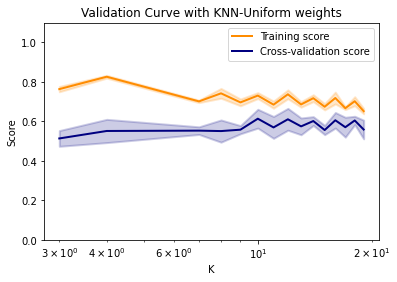

In [177]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

# knn = GridSearchCV(
# KNeighborsClassifier(),
# gridKNN,
# verbose=1,
# cv=5)

# # knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(xtrain_tfidf_ngram, y_train['label']) 



# # joblib.dump(knn, 'KNN_gridsearch_NLP_USEUSE.pkl')

# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold



# knnModel=knn
# knnModel.best_params_



# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_knn= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'euclidean',weights= 'uniform'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN-Uniform weights")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# y_cv


In [175]:

# from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn7 = KNeighborsClassifier(
n_neighbors=7,algorithm='kd_tree',
    metric='euclidean', weights= 'uniform')

# knn = KNeighborsClassifier(n_neighbors=2)
knn7.fit(xtrain_tfidf_ngram, y_train['label']) 



# joblib.dump(knn7, 'KNN_gridsearch_NLP_USE_K7USE.pkl')

knn_predictions7 = knn7.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions7)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions7,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions7)*100,'%')



KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=7)

knnoost Test Set
Accuracy: 67.48
Training Accuracy_Score: 75.8761206193969 %
Training Recall: 60.991379310344826 %
Training precision_score: 71.10552763819096 %
Training F1 Score: 65.66125290023203 %
Accuracy_Score: 66.99266503667481 %
precision_score: 53.43511450381679 %
recall_score: 48.61111111111111 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:1

Text(0.5, 1.0, 'LEARNING CURVE FOR KNN Classifier-Precision')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Precision'),
 <matplotlib.legend.Legend at 0x7f2745404278>)

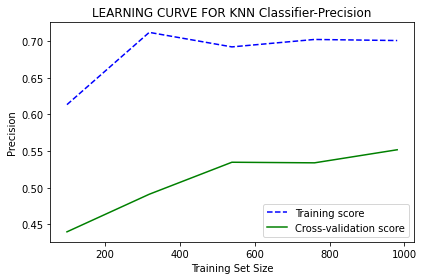

In [182]:
# from sklearn.model_selection import learning_curve
# from sklearn.metrics import f1_score, make_scorer
dtPredictions=knn7.predict(xtrain_tfidf_ngram)
# Custom scorer
target = 1 # class you want to plot
# scorer = make_scorer(lambda y_train,dtPredictions : f1_score(
#     y_train, dtPredictions, 
#     labels=None, 
    
#     average='binary', 
#     sample_weight=None))


sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(
n_neighbors=7,algorithm='kd_tree',
    metric='euclidean', weights= 'uniform'),xtrain_tfidf_ngram, y_train,scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR KNN Classifier-Precision") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [202]:
getMetrics(knn7,xtrain_tfidf_ngram,y_train,xtest_tfidf_ngram,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       263
           1       0.32      0.25      0.28       146

    accuracy                           0.55       409
   macro avg       0.48      0.48      0.48       409
weighted avg       0.52      0.55      0.53       409

Training Accuracy_Score: 75.8761206193969 %
Training Precision: 71.10552763819096 %
Training Recall: 60.991379310344826 %
Training F1 Score: 65.66125290023203 %
Test Accuracy_Score: 54.52322738386308 %
Test Precision: 32.45614035087719 %
Test Recall: 25.34246575342466 %
Test F1 Score: 28.461538461538467 %


# 6. Gradient Boosting 

In [124]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search.best_params_)

joblib.dump(xgb_clf, 'xgb_gridsearchNLPUSE.pkl')

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f262c5a2d00>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=None,
                                           min_chil...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                  

Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 8, 'gamma': 2, 'colsample_bytree': 0.8}


['xgb_gridsearchNLPUSE.pkl']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': 1,
        'gamma': 2,
        'subsample': 1, #prevents overfitting
        'colsample_bytree': 0.8,
        'max_depth': 8,
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])
# print('Best hyperparameters:')
# print(search.best_params_)

In [ ]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions = xgb_clf.predict(xvalid_tfidf_ngram)
xgb_predictions = np.round(xgb_predictions)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions)*100,'%')

In [ ]:

print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [149]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
    'n_estimators' : range(50, 400, 50)
        }

xgb_clf3 = xgb.XGBClassifier(learning_rate=0.3,  objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search2 = RandomizedSearchCV(xgb_clf3, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search2.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search2.best_params_)

joblib.dump(xgb_clf3, 'xgb_gridsearchNLP_Precision_estimatorsUSE.pkl')

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f2748363518>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=None,
                                           min_chil...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
           

Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}


['xgb_gridsearchNLP_Precision_estimatorsUSE.pkl']

In [150]:
xgb_clf3.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='logloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)>

In [ ]:
https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [151]:
# params={'subsample'= 1.0, 'n_estimators'= 50, 'min_child_weight'= 1, 'max_depth'= 5, 'gamma'= 0.5, 'colsample_bytree'= 1.0}

xgb_clf4 = xgb.XGBClassifier(learning_rate=0.3, 
                             subsample= 1.0, n_estimators= 50, min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf4.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])


[0]	validation_0-error:0.27873	validation_0-logloss:0.62048	validation_1-error:0.36919	validation_1-logloss:0.66525
[1]	validation_0-error:0.23553	validation_0-logloss:0.56638	validation_1-error:0.39609	validation_1-logloss:0.65426
[2]	validation_0-error:0.21271	validation_0-logloss:0.52615	validation_1-error:0.36675	validation_1-logloss:0.64223
[3]	validation_0-error:0.16463	validation_0-logloss:0.47974	validation_1-error:0.36430	validation_1-logloss:0.62352
[4]	validation_0-error:0.13529	validation_0-logloss:0.44232	validation_1-error:0.34474	validation_1-logloss:0.61242
[5]	validation_0-error:0.11328	validation_0-logloss:0.40565	validation_1-error:0.31296	validation_1-logloss:0.59879
[6]	validation_0-error:0.09047	validation_0-logloss:0.38075	validation_1-error:0.30807	validation_1-logloss:0.58948
[7]	validation_0-error:0.07090	validation_0-logloss:0.35381	validation_1-error:0.29340	validation_1-logloss:0.58963
[8]	validation_0-error:0.05949	validation_0-logloss:0.33465	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              eval_metric=['error', 'logloss'], gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [152]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions4)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions4)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions4)*100,'%')

xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions4 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')

Accuracy_Score: 68.45965770171149 %
precision_score: 56.88073394495413 %
recall_score: 43.05555555555556 %
XGBoost Test Set
Accuracy: 68.46
Training Accuracy_Score: 99.83700081499592 %
Training Recall: 99.56896551724138 %
Training precision_score: 100.0 %
Training F1 Score: 99.78401727861772 %


The max_depth of the weak learners is 5 whereas the max_depth we used in decision tree is 8. Reducing the max_depth of the weak learner should be decreased further to avoid overfitting

In [153]:
# params={'subsample'= 1.0, 'n_estimators'= 50, 'min_child_weight'= 1, 'max_depth'= 5, 'gamma'= 0.5, 'colsample_bytree'= 1.0}

xgb_clf5 = xgb.XGBClassifier(learning_rate=0.3, 
                             subsample= 1.0, n_estimators= 50, min_child_weight= 1, max_depth= 3, 
                             gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf5.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])



# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions5 = xgb_clf5.predict(xvalid_tfidf_ngram)
xgb_predictions5 = np.round(xgb_predictions5)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions5)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions5)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions5)*100,'%')

xgb_predictions5 = xgb_clf5.predict(xvalid_tfidf_ngram)
xgb_predictions5 = np.round(xgb_predictions5)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions5 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf5.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf5.predict(xtrain_tfidf_ngram))*100,'%')

[0]	validation_0-error:0.33089	validation_0-logloss:0.64789	validation_1-error:0.36919	validation_1-logloss:0.66466
[1]	validation_0-error:0.32274	validation_0-logloss:0.61836	validation_1-error:0.40342	validation_1-logloss:0.65098
[2]	validation_0-error:0.29014	validation_0-logloss:0.59148	validation_1-error:0.37408	validation_1-logloss:0.63867
[3]	validation_0-error:0.28036	validation_0-logloss:0.56973	validation_1-error:0.36186	validation_1-logloss:0.63071
[4]	validation_0-error:0.25672	validation_0-logloss:0.55012	validation_1-error:0.35941	validation_1-logloss:0.63090
[5]	validation_0-error:0.24450	validation_0-logloss:0.53856	validation_1-error:0.36186	validation_1-logloss:0.62918
[6]	validation_0-error:0.23472	validation_0-logloss:0.52289	validation_1-error:0.34230	validation_1-logloss:0.62644
[7]	validation_0-error:0.22005	validation_0-logloss:0.50568	validation_1-error:0.33007	validation_1-logloss:0.62311
[8]	validation_0-error:0.19804	validation_0-logloss:0.48980	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              eval_metric=['error', 'logloss'], gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy_Score: 64.30317848410758 %
precision_score: 49.09090909090909 %
recall_score: 37.5 %
XGBoost Test Set
Accuracy: 64.30
Training Accuracy_Score: 98.37000814995925 %
Training Recall: 97.19827586206897 %
Training precision_score: 98.47161572052401 %
Training F1 Score: 97.83080260303689 %


In [154]:
# params={'subsample'= 1.0, 'n_estimators'= 50, 'min_child_weight'= 1, 'max_depth'= 5, 'gamma'= 0.5, 'colsample_bytree'= 1.0}

xgb_clf6 = xgb.XGBClassifier(learning_rate=0.3, 
                             subsample= 0.8, n_estimators= 50, min_child_weight= 1, max_depth= 3, 
                             gamma= 0.5, colsample_bytree= 0.8,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf6.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])



# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions6 = xgb_clf6.predict(xvalid_tfidf_ngram)
xgb_predictions6 = np.round(xgb_predictions6)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions6)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions6)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions6)*100,'%')

xgb_predictions6 = xgb_clf6.predict(xvalid_tfidf_ngram)
xgb_predictions6 = np.round(xgb_predictions6)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions6 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf6.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf6.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf6.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf6.predict(xtrain_tfidf_ngram))*100,'%')

[0]	validation_0-error:0.35371	validation_0-logloss:0.65355	validation_1-error:0.34719	validation_1-logloss:0.66612
[1]	validation_0-error:0.31296	validation_0-logloss:0.62087	validation_1-error:0.37408	validation_1-logloss:0.65527
[2]	validation_0-error:0.29910	validation_0-logloss:0.60096	validation_1-error:0.38631	validation_1-logloss:0.64716
[3]	validation_0-error:0.28117	validation_0-logloss:0.57740	validation_1-error:0.36675	validation_1-logloss:0.64229
[4]	validation_0-error:0.27139	validation_0-logloss:0.55783	validation_1-error:0.33985	validation_1-logloss:0.63354
[5]	validation_0-error:0.24287	validation_0-logloss:0.53936	validation_1-error:0.37164	validation_1-logloss:0.63133
[6]	validation_0-error:0.23146	validation_0-logloss:0.52403	validation_1-error:0.34719	validation_1-logloss:0.62808
[7]	validation_0-error:0.22331	validation_0-logloss:0.50933	validation_1-error:0.34474	validation_1-logloss:0.62934
[8]	validation_0-error:0.21353	validation_0-logloss:0.49498	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              eval_metric=['error', 'logloss'], gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy_Score: 66.25916870415648 %
precision_score: 52.54237288135594 %
recall_score: 43.05555555555556 %
XGBoost Test Set
Accuracy: 66.26
Training Accuracy_Score: 98.20700896495518 %
Training Recall: 96.98275862068965 %
Training precision_score: 98.2532751091703 %
Training F1 Score: 97.61388286334056 %


Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

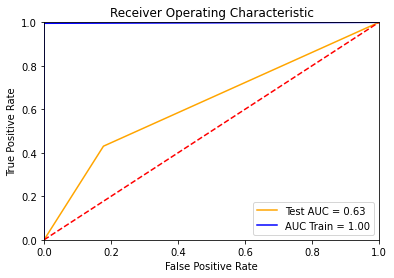

In [186]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions4)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
xgb_clf.get_params

Tuning parameter learning_rate and max_depth as the model is overfitting

Text(0.5, 1.0, 'Validation Curve with XGB')

Text(0.5, 0, 'colsample_bytree')

Text(0, 0.5, 'Score')

(0.0, 1.1)

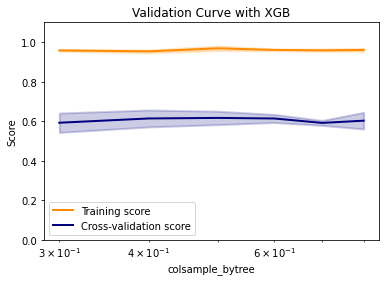

In [157]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,
                             subsample= 1.0,  min_child_weight= 1, max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="colsample_bytree",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("colsample_bytree")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Validation Curve with XGB')

Text(0.5, 0, 'subsample')

Text(0, 0.5, 'Score')

(0.0, 1.1)

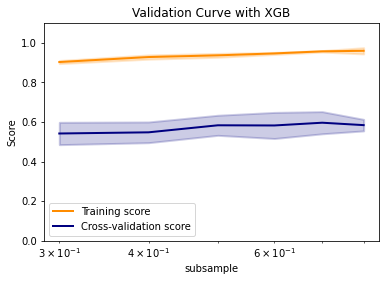

In [159]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,
                            min_child_weight= 1, max_depth= 3, gamma= 0.5, 
                     colsample_bytree= 0.8,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="subsample",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("subsample")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Validation Curve with XGB')

Text(0.5, 0, 'lambda')

Text(0, 0.5, 'Score')

(0.0, 1.1)

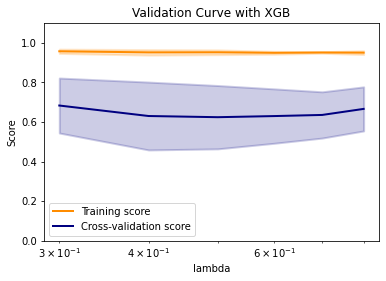

In [163]:
# lambda
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.001, n_estimators=50,
                            min_child_weight= 1, max_depth= 3, gamma= 0, 
                     colsample_bytree= 0.8,subsample=0.6,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="lambda",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("lambda")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Validation Curve with XGB')

Text(0.5, 0, 'lambda')

Text(0, 0.5, 'Score')

(0.0, 1.1)

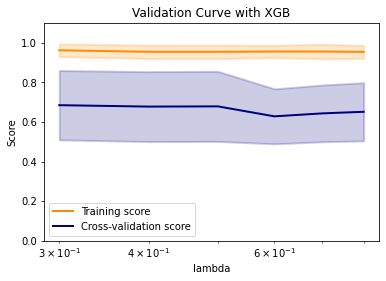

In [165]:
# lambda
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.001, n_estimators=50,booster='dart',
                            min_child_weight= 1, max_depth= 3, gamma= 0, 
                     colsample_bytree= 0.8,subsample=0.6,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="lambda",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("lambda")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Validation Curve with XGB')

Text(0.5, 0, 'subsample')

Text(0, 0.5, 'Score')

(0.0, 1.1)

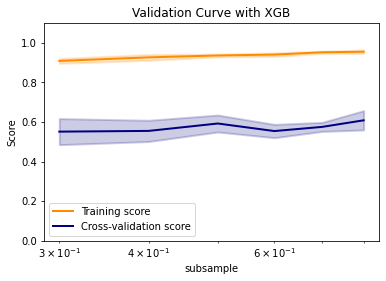

In [181]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,booster='dart',
#                              subsample= 1.0,
              max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="subsample",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("subsample")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'LEARNING CURVE FOR XGB Classifier-Precision')

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'Precision'),
 <matplotlib.legend.Legend at 0x7f269d771f60>)

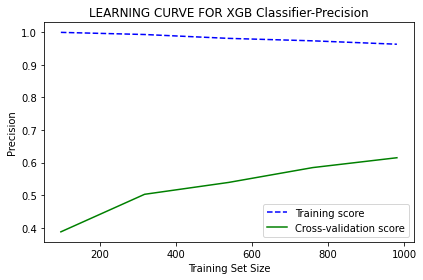

In [185]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
dtPredictions=dt.predict(xtrain_tfidf_ngram)
# Custom scorer
target = 1 # class you want to plot
scorer = make_scorer(lambda y_train,dtPredictions : f1_score(
    y_train, dtPredictions, 
    labels=None, 
    
    average='binary', 
    sample_weight=None))


sizes, training_scores, testing_scores = learning_curve(xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,booster='dart',
#                              subsample= 1.0,
              max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]),
                                                        xtrain_tfidf_ngram, y_train,scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR XGB Classifier-Precision") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [204]:
xgb_clf_FINAL=xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,booster='dart',
#                              subsample= 1.0,
              max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])
xgb_clf_FINAL.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])



# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictionsFIANAL = xgb_clf_FINAL.predict(xvalid_tfidf_ngram)
xgb_predictionsFIANAL = np.round(xgb_predictionsFIANAL)

[0]	validation_0-error:0.33089	validation_0-logloss:0.67639	validation_1-error:0.36919	validation_1-logloss:0.68164
[1]	validation_0-error:0.31948	validation_0-logloss:0.66238	validation_1-error:0.34474	validation_1-logloss:0.67043
[2]	validation_0-error:0.32192	validation_0-logloss:0.65033	validation_1-error:0.33985	validation_1-logloss:0.66289
[3]	validation_0-error:0.30399	validation_0-logloss:0.63957	validation_1-error:0.35452	validation_1-logloss:0.65647
[4]	validation_0-error:0.28362	validation_0-logloss:0.62938	validation_1-error:0.34474	validation_1-logloss:0.65089
[5]	validation_0-error:0.29177	validation_0-logloss:0.61928	validation_1-error:0.34963	validation_1-logloss:0.64681
[6]	validation_0-error:0.27384	validation_0-logloss:0.60944	validation_1-error:0.34230	validation_1-logloss:0.64185
[7]	validation_0-error:0.27221	validation_0-logloss:0.60022	validation_1-error:0.34719	validation_1-logloss:0.63999
[8]	validation_0-error:0.27302	validation_0-logloss:0.59164	validation_1

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['error', 'logloss'], gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [258]:
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictionsFIANAL)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictionsFIANAL)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictionsFIANAL)*100,'%')
print('Training F1 Score:',metrics.f1_score(y_cv, xgb_predictionsFIANAL)*100,'%')
# xgb_predictions6 = xgb_clf6.predict(xvalid_tfidf_ngram)
# xgb_predictions6 = np.round(xgb_predictions6)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions6 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf_FINAL.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf_FINAL.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf_FINAL.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf_FINAL.predict(xtrain_tfidf_ngram))*100,'%')

Accuracy_Score: 67.72616136919315 %
precision_score: 57.89473684210527 %
recall_score: 30.555555555555557 %
Training F1 Score: 40.00000000000001 %
XGBoost Test Set
Accuracy: 66.26
Training Accuracy_Score: 89.64955175224124 %
Training Recall: 76.72413793103449 %
Training precision_score: 94.93333333333334 %
Training F1 Score: 84.86293206197854 %


In [257]:
print('testing Accuracy_Score:',metrics.accuracy_score(y_test['label'], xgb_clf_FINAL.predict(xtest_tfidf_ngram))*100,'%')
print('testing Recall:',metrics.recall_score(y_test, xgb_clf_FINAL.predict(xtest_tfidf_ngram))*100,'%')
print('testing precision_score:',metrics.precision_score(y_test, xgb_clf_FINAL.predict(xtest_tfidf_ngram))*100,'%')
print('testing F1 Score:',metrics.f1_score(y_test, xgb_clf_FINAL.predict(xtest_tfidf_ngram))*100,'%')

testing Accuracy_Score: 55.74572127139364 %
testing Recall: 26.71232876712329 %
testing precision_score: 34.51327433628318 %
testing F1 Score: 30.11583011583011 %


In [ ]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb=  range(50, 400, 50)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, 
                             subsample= 1.0,  min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="n_estimators",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= range(50, 400, 50)
plt.title("Validation Curve with XGB")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()